# imports and loading the dataset

In [1971]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [1972]:
df = pd.read_csv('kagglex-cohort4/train.csv')

# very basic EDA to check data imbalance and null values

In [1973]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [1974]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


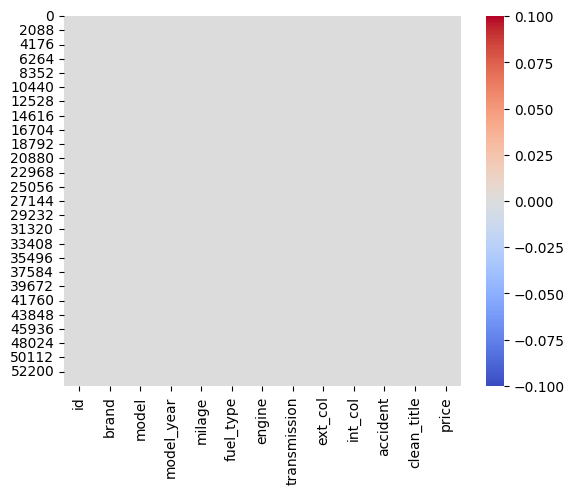

In [1975]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

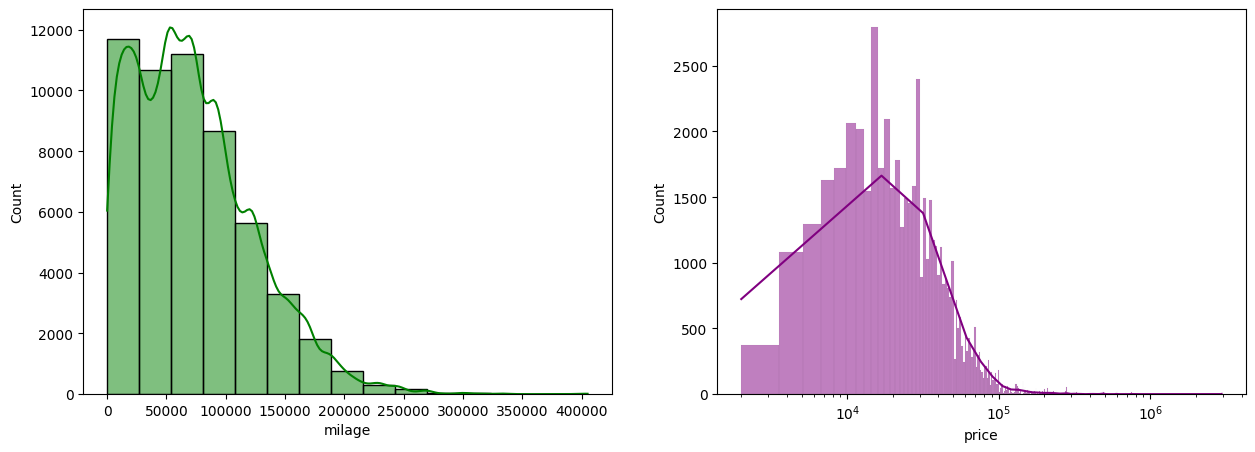

In [1976]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df['milage'],color="green",bins=15,kde=True)

plt.subplot(1, 2, 2)

sns.histplot(df['price'],color="purple",kde=True)
plt.xscale('log')


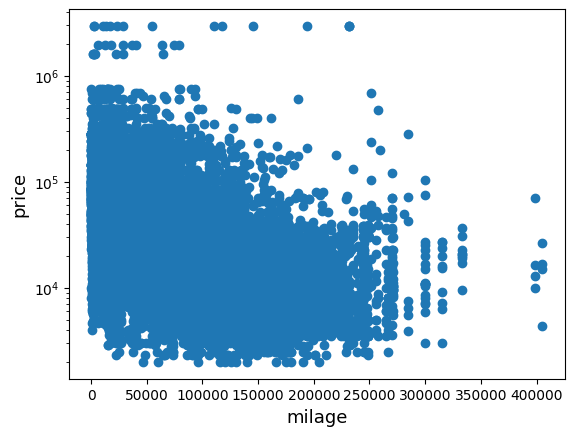

In [1977]:
fig, ax = plt.subplots()
ax.scatter(x = df['milage'], y = df['price'])
plt.ylabel('price', fontsize=13)
plt.yscale('log')
plt.xlabel('milage', fontsize=13)
plt.show()

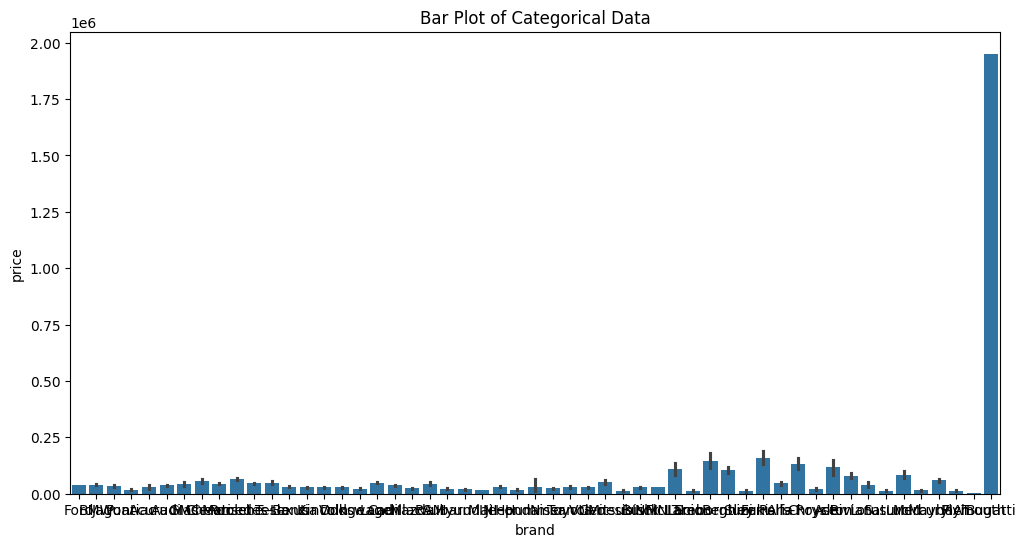

In [1978]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df)
plt.title('Bar Plot of Categorical Data')
plt.show()

In [1979]:
for column in df.iloc[:,1:-1].columns:
    print(f'column name: {column} \t column unique values count:\n {df[column].value_counts()}')

column name: brand 	 column unique values count:
 brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              5

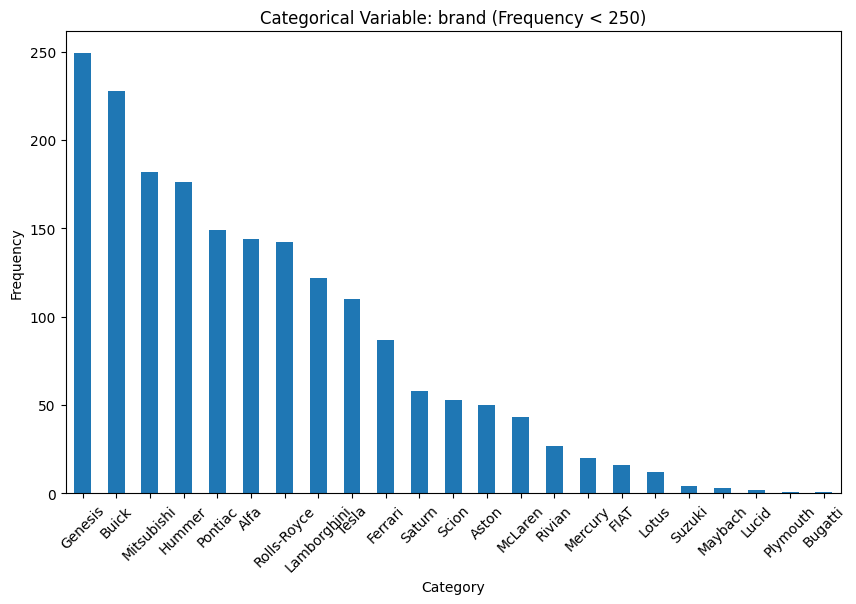

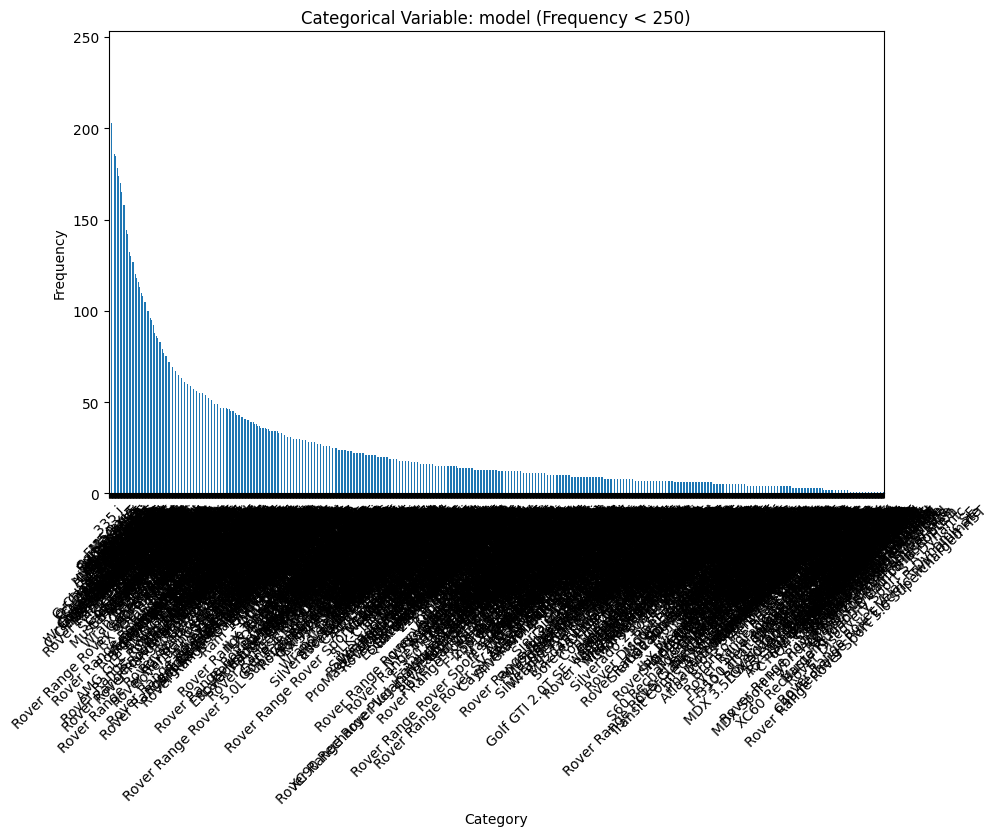

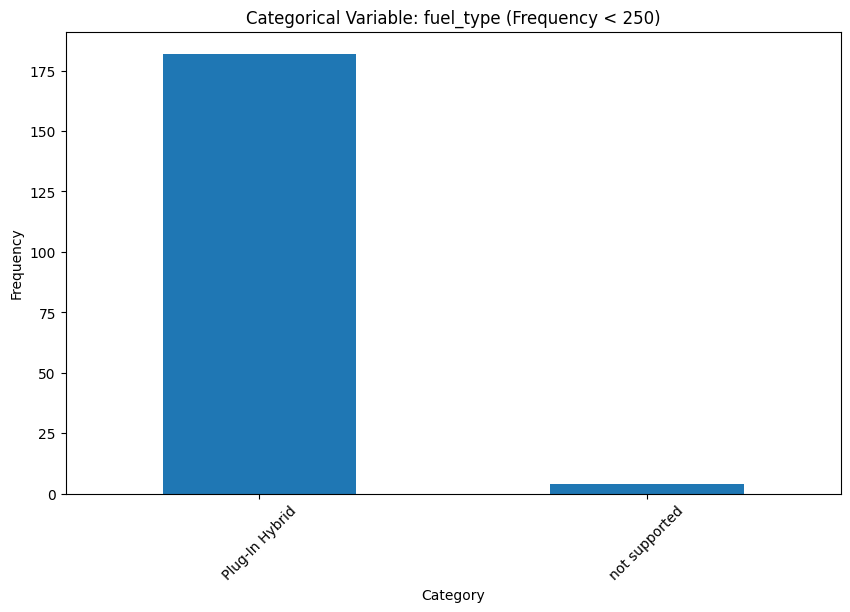

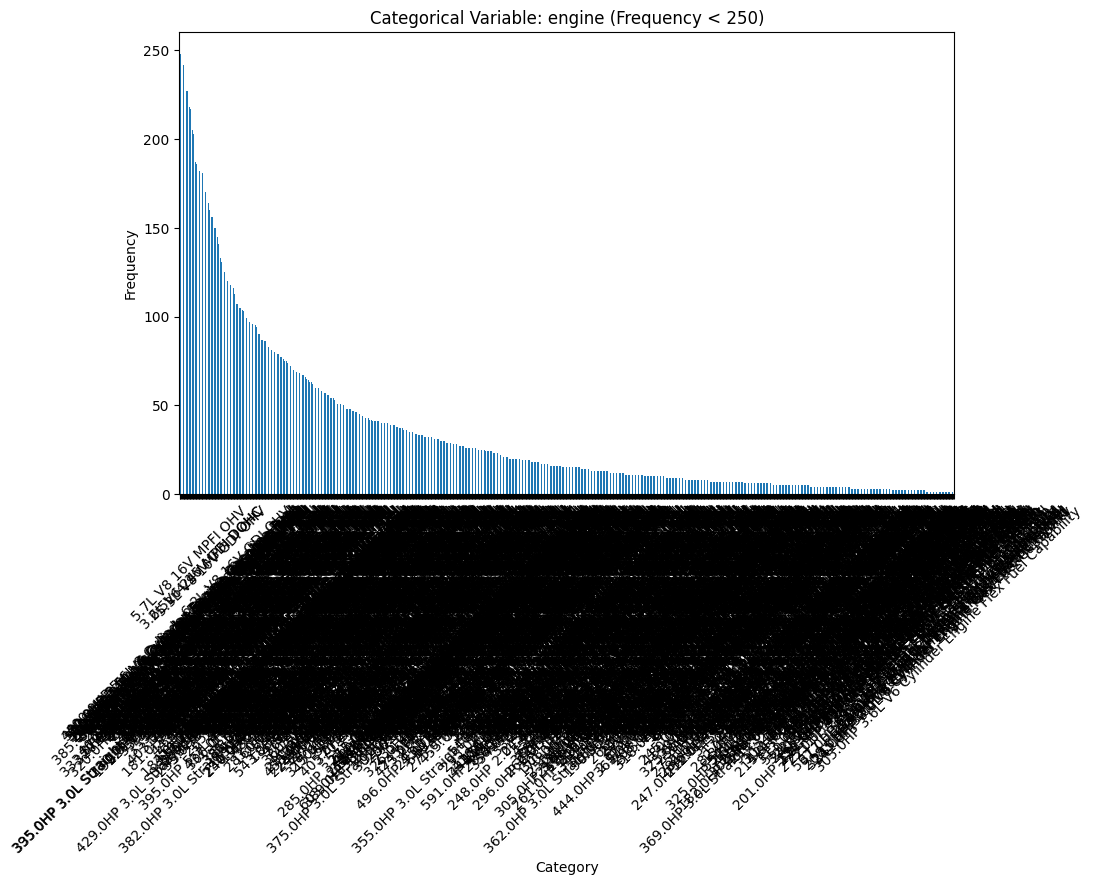

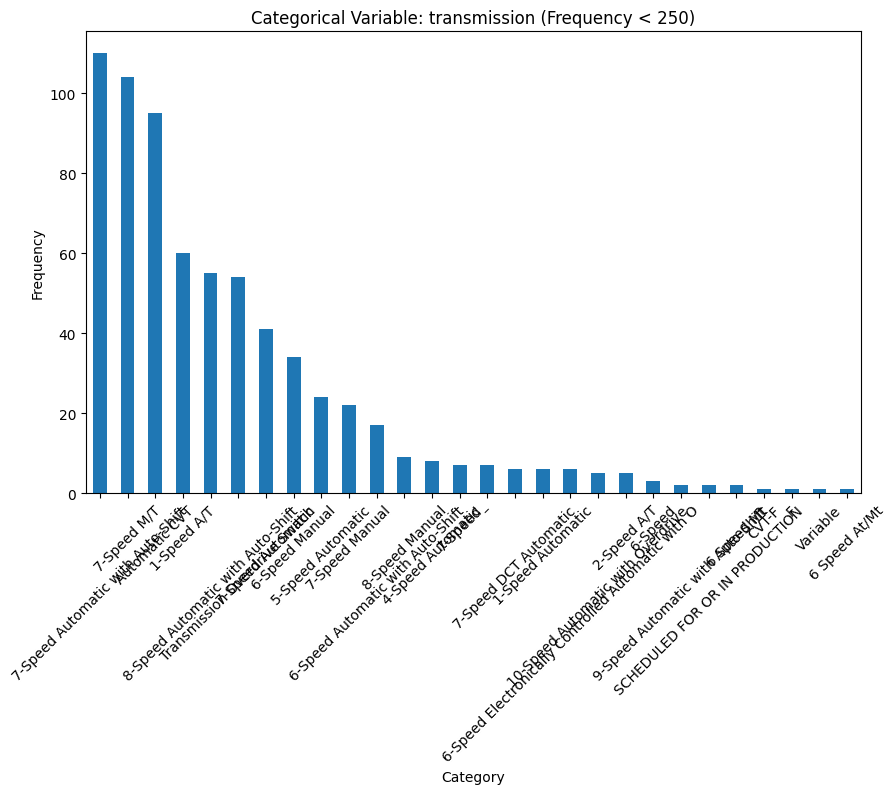

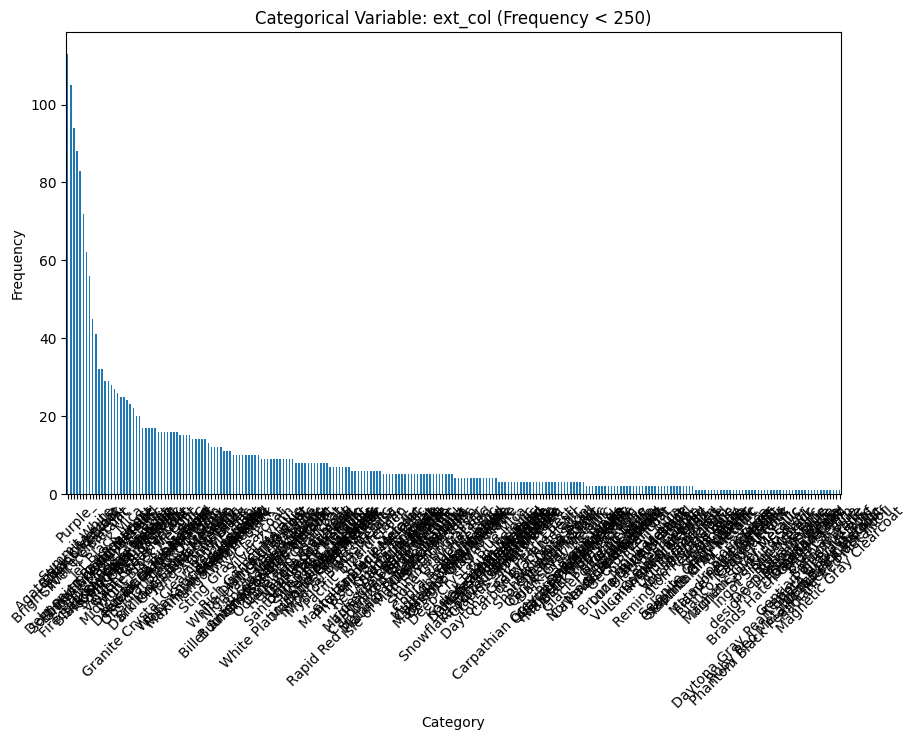

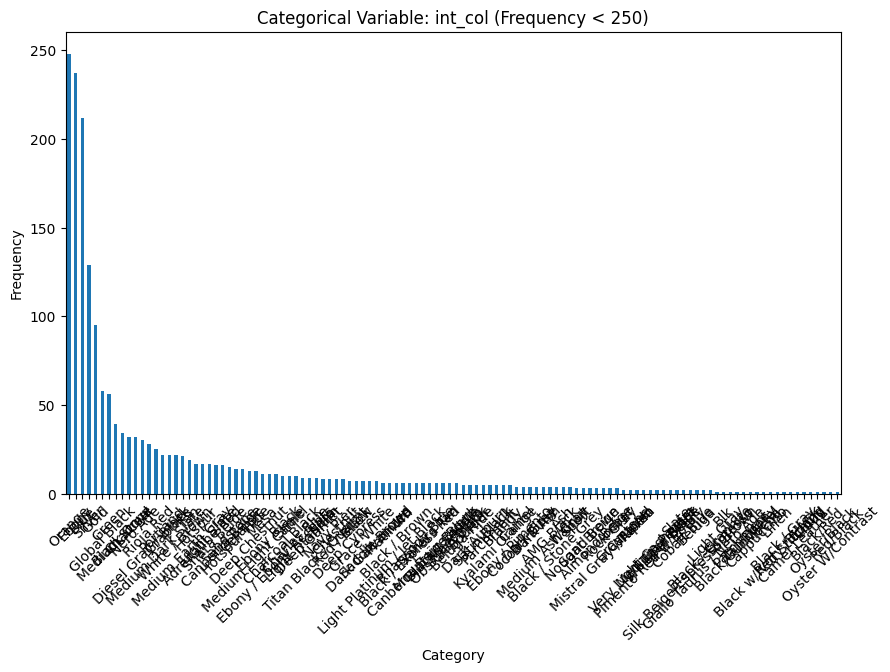

In [1980]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold_frequency = 250

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    value_counts_col = df[col].value_counts()
    
    less_than_threshold = value_counts_col[value_counts_col < threshold_frequency]
    
    if not less_than_threshold.empty:
        plt.figure(figsize=(10, 6))
        less_than_threshold.plot(kind='bar')
        plt.title(f'Categorical Variable: {col} (Frequency < {threshold_frequency})')
        plt.xlabel('Category')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()


# Preprocessing the data 

In [1981]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [1982]:
df = pd.read_csv('kagglex-cohort4/train.csv')
threshold = 3
z_scores = df.select_dtypes(include=['number']).apply(lambda x: np.abs((x - x.mean()) / x.std()))
df = df[(z_scores < threshold).all(axis=1)]
encoded_columns  = ['int_col','ext_col']
ordinal_encoder = OrdinalEncoder()
df[encoded_columns] = ordinal_encoder.fit_transform(df[encoded_columns])

In [1983]:
# df['model_year>2010']=df['model_year'].astype(int).apply(lambda age:age >2010)
# df['transmission'] = df['ext_col']+'-'+df['int_col']
df.rename(columns={'ext_col': 'combined_col'}, inplace=True)
bin_edges = range(1970, 2031, 5)
bin_labels = [f'{start}-{start+9}' for start in bin_edges[:-1]]
df['model_year_bins'] = pd.cut(df['model_year'], bins=bin_edges, labels=bin_labels, right=False)


In [1984]:
df.drop('model_year',axis=1,inplace=True)
df.drop('clean_title',axis=1,inplace=True)
# df.drop('int_col',axis=1,inplace=True)

In [1985]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
threshold_frequency = 250

for col in categorical_columns:
    value_counts_col = df[col].value_counts()
    
    less_than_threshold = value_counts_col[value_counts_col < threshold_frequency]
    
    df[col] = df[col].apply(lambda x: 'Other' if x in less_than_threshold else x)


In [1986]:
for col in categorical_columns:
    category_frequency = df[col].value_counts(normalize=True)
    df[col] = df[col].map(category_frequency)

In [1987]:
df

,id,brand,model,milage,fuel_type,engine,transmission,combined_col,int_col,accident,price,model_year_bins
0,0,0.122762,0.009282,74349,0.913612,0.012678,0.040638,25.0,57.0,0.735006,11000,0.400321
1,1,0.138081,0.845335,80000,0.913612,0.027337,0.067050,16.0,9.0,0.735006,8250,0.112461
2,2,0.011923,0.845335,91491,0.913612,0.659787,0.111140,180.0,6.0,0.735006,15000,0.112461
3,3,0.138081,0.845335,2437,0.033053,0.659787,0.120498,99.0,24.0,0.735006,63500,0.235657
4,4,0.033204,0.845335,111000,0.913612,0.659787,0.306311,248.0,9.0,0.735006,7850,0.040883
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,0.138081,0.845335,29000,0.913612,0.007603,0.135912,248.0,24.0,0.735006,29000,0.400321
54269,54269,0.054882,0.845335,94634,0.027375,0.659787,0.111140,16.0,9.0,0.264994,6500,0.400321
54270,54270,0.048052,0.845335,40989,0.913612,0.659787,0.120498,248.0,9.0,0.264994,18950,0.207735
54271,54271,0.048052,0.845335,1518,0.913612,0.659787,0.011791,12.0,24.0,0.735006,194965,0.235657


# training

In [1988]:
X = df.iloc[:,:]
y = df.iloc[:,-2]

In [1989]:
X.drop('price',axis=1,inplace=True)
X.drop('id',axis=1,inplace=True)


In [1990]:
model = xgb.XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=0,
    nthread=-1,
    seed=42
)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [1991]:
predictions = model.predict(X_test)
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
test_score = model.score(X_test, y_test)
print("Test Score:", test_score)


Cross-Validation Scores: [0.42411721 0.42925155 0.41700977 0.44227266 0.42466128]
Test Score: 0.42654359340667725


Root Mean Squared Error: 23309.13733987214


c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Residuals')

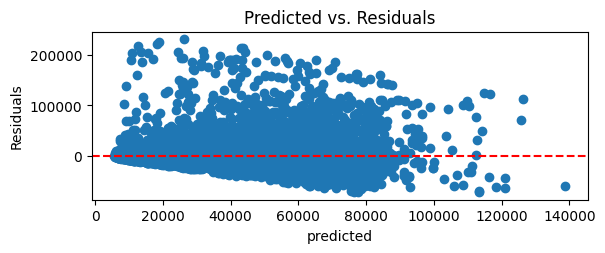

In [1992]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

residuals = y_test - predictions
plt.subplot(2, 1, 1)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('predicted')
plt.ylabel('Residuals')


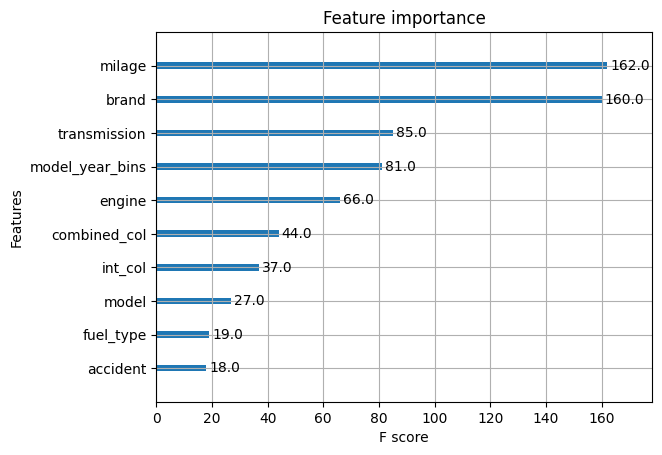

In [1993]:
xgb.plot_importance(model)
plt.show()

In [1994]:
comparision = pd.DataFrame({'actual':y_test,'predicted':predictions})
comparision.to_csv('comparisions.csv')

In [1995]:
df = pd.read_csv('kagglex-cohort4/test.csv')
percentage_error = np.abs((y_test - predictions) / y_test) * 100
error_df = pd.DataFrame({'actual':y_test,'predicted':predictions,'error':percentage_error})
error_df = error_df[error_df['error'] > 20]
error_df.to_csv('bad_predictions.csv')
matched_ids = error_df.index
matched_instances_df = df[df.index.isin(matched_ids)]

In [1996]:
for column in matched_instances_df.iloc[:, 1:-1].columns:
    print(f'Column name: {column}\nColumn unique values count:\n{matched_instances_df[column].value_counts()}\n')

Column name: brand
Column unique values count:
brand
BMW              979
Ford             852
Chevrolet        596
Mercedes-Benz    577
Audi             350
Porsche          338
Lexus            304
Toyota           299
Jeep             274
Land             243
Cadillac         197
Nissan           163
Dodge            140
GMC              136
RAM              127
Lincoln          115
INFINITI         115
Jaguar            92
Subaru            89
Honda             86
Mazda             79
Hyundai           76
Volkswagen        70
Kia               67
Acura             66
MINI              51
Volvo             51
Buick             43
Genesis           37
Bentley           36
Maserati          35
Chrysler          33
Hummer            22
Lamborghini       21
Mitsubishi        19
Pontiac           16
Rolls-Royce       16
Tesla             15
Alfa              14
Saturn             6
Scion              6
Aston              6
Ferrari            6
Rivian             5
Lotus              3
Mc

In [1997]:
matched_instances_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
6,54279,Land,Rover Range Rover 3.0L V6 Supercharged HSE,2019,41200,Gasoline,380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes
7,54280,Land,Rover Range Rover Velar P250 SE R-Dynamic,2019,58000,Gasoline,247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,Black,At least 1 accident or damage reported,Yes
11,54284,Kia,Optima Hybrid LX,2013,103111,Hybrid,199.0HP 2.4L 4 Cylinder Engine Gas/Electric Hy...,A/T,Silver,Beige,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
36154,90427,Land,Rover Range Rover Velar P250 S R-Dynamic,2020,58000,Gasoline,247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Red,White,None reported,Yes
36159,90432,BMW,M3 Base,2017,65212,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Gray,Black,None reported,Yes
36167,90440,Cadillac,Escalade ESV Platinum,2017,134000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes
36171,90444,RAM,2500 Big Horn,2021,18000,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Gray,None reported,Yes


# prediction

In [1998]:
dft=pd.read_csv('kagglex-cohort4/test.csv')
dft_copy=pd.read_csv('kagglex-cohort4/test.csv')
dft['model_year>2010']=dft['model_year'].astype(int).apply(lambda age:age >2010)
dft.drop('model_year',axis=1,inplace=True)
dft.drop('clean_title',axis=1,inplace=True)
dft.drop('id',axis=1,inplace=True)
categorical_columns = dft.select_dtypes(include=['object', 'category']).columns
threshold_frequency = 250
for col in categorical_columns:
    value_counts_col = dft[col].value_counts()
    
    less_than_threshold = value_counts_col[value_counts_col < threshold_frequency]
    
    dft[col] = dft[col].apply(lambda x: 'Other' if x in less_than_threshold else x)
categorical_columns = dft.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    category_frequency = dft[col].value_counts(normalize=True)
    dft[col] = dft[col].map(category_frequency)

In [1999]:
predictions=predictions = model.predict(dft)

ValueError: feature_names mismatch: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'combined_col', 'int_col', 'accident', 'model_year_bins'] ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'model_year>2010']
expected combined_col, model_year_bins in input data
training data did not have the following fields: ext_col, model_year>2010

In [ ]:
dft

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,model_year>2010
0,0.090236,0.007048,73000,0.912943,0.010640,0.311555,0.243070,0.151121,0.735097,True
1,0.042285,0.923555,128032,0.912943,0.739021,0.133156,0.095791,0.583755,0.735097,True
2,0.090236,0.923555,51983,0.912943,0.739021,0.061244,0.087168,0.021281,0.735097,True
3,0.037587,0.923555,29500,0.912943,0.739021,0.117901,0.243070,0.021281,0.264903,True
4,0.134151,0.923555,90000,0.912943,0.010779,0.133156,0.243070,0.583755,0.264903,True
...,...,...,...,...,...,...,...,...,...,...
36178,0.020700,0.923555,4500,0.912943,0.016803,0.039881,0.148799,0.583755,0.735097,True
36179,0.082718,0.923555,185000,0.912943,0.739021,0.015228,0.057126,0.118923,0.264903,False
36180,0.043501,0.923555,116000,0.912943,0.739021,0.013017,0.059310,0.118923,0.735097,True
36181,0.013708,0.923555,39000,0.912943,0.739021,0.039881,0.277119,0.039355,0.735097,True


In [ ]:
submission_df = pd.DataFrame({'id': dft_copy['id'], 'price': predictions})
submission_df.to_csv('submission.csv', index=False)
